### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [78]:
# Import Necessary Libraries
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [79]:

# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv("pet_adoption_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.sample(10)

Number of rows and columns: (2007, 13)
First few rows of the dataset:


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
824,1324,Bird,Parakeet,142,Brown,Medium,23.571838,1,0,15,383,1,1
385,885,Rabbit,Rabbit,30,Gray,Small,13.009814,1,0,57,213,0,0
1094,1594,Bird,Parakeet,38,Orange,Small,26.747300,1,0,52,289,1,0
121,621,Dog,Golden Retriever,164,Gray,Large,9.065253,0,0,3,466,1,0
153,653,Cat,Siamese,160,White,Small,27.526142,1,0,6,65,0,0
706,1206,Dog,Golden Retriever,104,Brown,Small,12.441983,0,0,66,496,0,0
1346,1846,Rabbit,Rabbit,164,Black,Small,14.920537,1,0,44,181,0,0
1678,2178,Cat,Siamese,8,Orange,Small,26.925207,1,0,38,97,0,1
925,1425,Bird,Parakeet,76,Gray,Medium,4.082077,0,0,68,191,1,0
1263,1763,Dog,Golden Retriever,70,Black,Small,8.400285,1,0,74,167,0,0


In [80]:
# Step 4: Drop the columns that do not add much value to the analysis
df=df.drop(['pet_id',],axis=1)


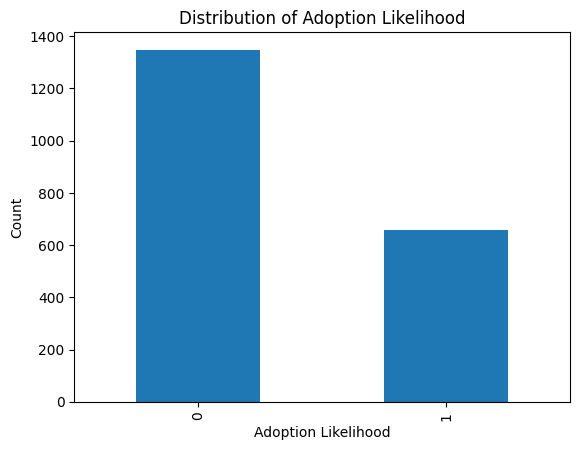

In [81]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
df['adoption_likelihood'].value_counts().plot(kind='bar')
plt.title('Distribution of Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.show()

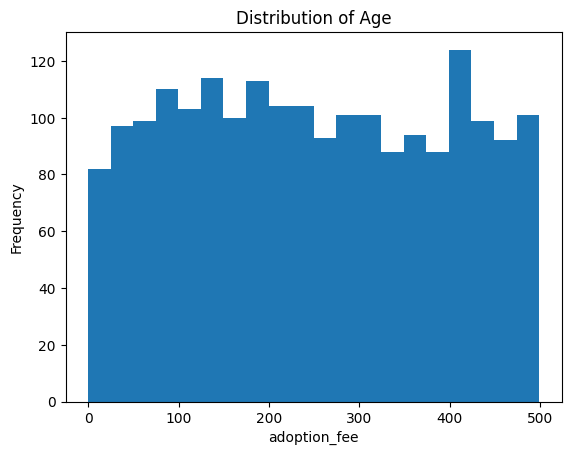

In [82]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
# Step 6: Visualize the distribution of 'age_months' using a histogram
df['adoption_fee'].plot(kind='hist', bins=20)
plt.title('Distribution of Age')
plt.xlabel('adoption_fee')
plt.show()

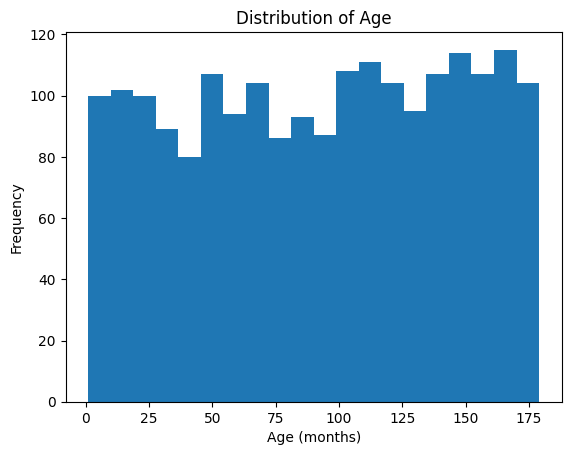

In [83]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
# Step 6: Visualize the distribution of 'age_months' using a histogram
df['age_months'].plot(kind='hist', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age (months)')
plt.show()

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'color'`, `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
    - `'adoption_fee'`: Standard scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [89]:
df['size'] = df['size'].replace({'Small': 0, 'Medium': 1, 'Large': 2})


df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)


KeyError: "None of [Index(['color', 'pet_type', 'breed'], dtype='object')] are in the [columns]"

In [ ]:
# Step 2: Scale the numerical features
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale=MinMaxScaler()
df['weight_kg']=scale.fit_transform(df[['weight_kg']])

scale=StandardScaler()
df['adoption_fee']=scale.fit_transform(df[['adoption_fee']])




In [90]:
# step3: Display the first few rows of the updated dataset.
df.sample(10)


,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
722,8,0,0.516781,0,0,53,0.874041,0,0,False,...,True,False,False,False,False,True,False,False,False,False
327,15,2,0.084582,1,0,58,-0.568017,1,1,False,...,True,False,False,False,False,True,False,False,False,False
1547,53,0,0.561287,0,1,20,-1.730063,0,0,False,...,False,True,False,False,False,False,False,False,False,True
472,109,0,0.074964,1,1,23,0.552028,0,0,False,...,False,False,True,False,False,False,False,False,False,False
1180,170,2,0.471403,1,0,50,-1.541056,0,0,False,...,False,False,False,True,False,False,False,False,True,False
1765,71,0,0.421255,1,0,66,0.678033,1,0,False,...,True,True,False,False,False,False,True,False,False,False
346,32,2,0.362520,1,0,56,-1.170041,1,0,False,...,True,False,False,True,False,False,False,False,True,False
954,1,0,0.755021,1,0,29,0.041008,0,1,False,...,True,False,False,False,False,True,False,False,False,False
841,35,1,0.364884,1,0,26,0.426023,1,1,False,...,False,False,False,False,False,True,False,False,False,False
283,28,0,0.414851,1,0,4,0.230015,1,0,False,...,False,False,False,False,False,True,False,False,False,False


### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [91]:
# Step 1: Select the features and the target variable for modeling
X = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 1: Select the features and the target variable for modeling

# Step 1: Select the features and the target variable for modeling
X = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [92]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 4: Print the model's accuracy score on the test data
print("Model Accuracy on Test Data:", model.score(X_test, y_test))


Model Accuracy on Test Data: 0.8606965174129353


In [93]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       403
           1       0.75      0.86      0.80       200

    accuracy                           0.86       603
   macro avg       0.84      0.86      0.85       603
weighted avg       0.87      0.86      0.86       603



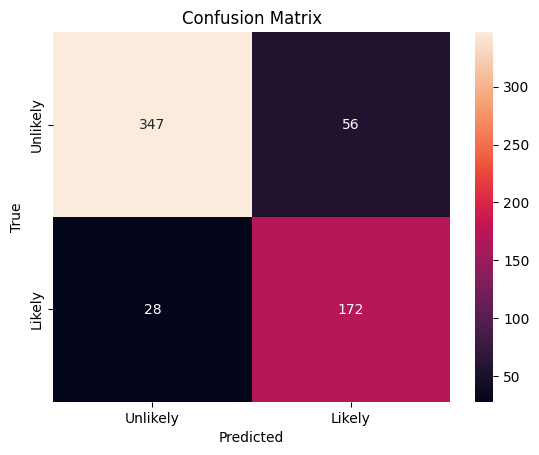

In [94]:
# Step 7: Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [95]:
# Step 1: Train the Decision Tree model with specified hyperparameters
model_custom = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
model_custom.fit(X_train, y_train)

# Step 2: Print the model's accuracy score on the test data
print("Custom Model Accuracy on Test Data:", model_custom.score(X_test, y_test))

# Step 3: Make predictions on the test set
y_pred_custom = model_custom.predict(X_test)

# Step 4: Evaluate the model using a classification report and confusion matrix
print(classification_report(y_test, y_pred_custom))

Custom Model Accuracy on Test Data: 0.9054726368159204
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603



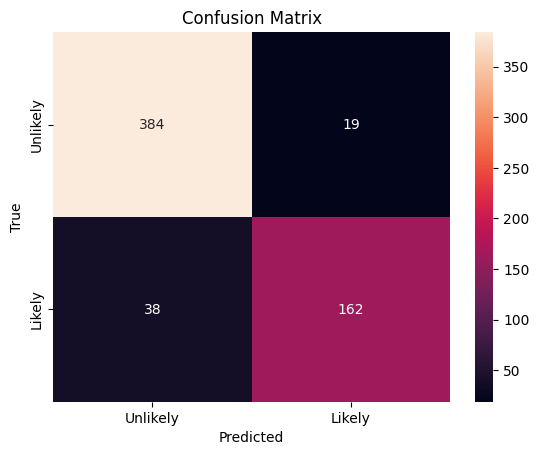

In [96]:
# Step 5: Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [103]:
# Step 6: Visualize the decision tree
print(export_text(model_custom, feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 0.50
|   |   |   |--- age_months <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- age_months >  21.50
|   |   |   |   |--- class: 0
|   |   |--- size >  0.50
|   |   |   |--- size <= 1.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  1.50
|   |   |   |   |--- adoption_fee <= -0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  -0.49
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- timein_shelter_days <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- timein_shelter_days >  34.50
|   |   |   |   |--- color_Brown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- color_Brown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- size <= 1.5